In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# TASK1_1
d = pd.read_csv(r'C:\Users\akshi\Documents\C8\DS1_C8_S2_SmartCarRiding_Data_Practice.csv')
d

,Index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,49:00.0,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,09:00.0,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,42:00.0,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,56:25.0,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1


In [3]:
# TASK1-2
d.describe

<bound method NDFrame.describe of            Index      key  fare_amount          pickup_datetime  \
0       24238194  52:06.0          7.5  2015-05-07 19:52:06 UTC   
1       27835199  04:56.0          7.7  2009-07-17 20:04:56 UTC   
2       44984355  45:00.0         12.9  2009-08-24 21:45:00 UTC   
3       25894730  22:21.0          5.3  2009-06-26 08:22:21 UTC   
4       17610152  47:00.0         16.0  2014-08-28 17:47:00 UTC   
...          ...      ...          ...                      ...   
199995  42598914  49:00.0          3.0  2012-10-28 10:49:00 UTC   
199996  16382965  09:00.0          7.5  2014-03-14 01:09:00 UTC   
199997  27804658  42:00.0         30.9  2009-06-29 00:42:00 UTC   
199998  20259894  56:25.0         14.5  2015-05-20 14:56:25 UTC   
199999  11951496  08:00.0         14.1  2010-05-15 04:08:00 UTC   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
0             -73.999817        40.738354         -73.999512   
1             -73.994355        4

In [4]:
d["fare_amount"]

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 200000, dtype: float64

In [5]:
d.dtypes

Index                  int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [6]:
# Seperating numerical n categorical columns
conti = d.select_dtypes(include="number")  # Selects all numerical columns (e.g., int, float, boolean)
categ = d.select_dtypes(exclude="number") # Selects all non-numerical columns (categorical, object, date, etc.)
print(conti)
print(categ)

           Index  fare_amount  pickup_longitude  pickup_latitude  \
0       24238194          7.5        -73.999817        40.738354   
1       27835199          7.7        -73.994355        40.728225   
2       44984355         12.9        -74.005043        40.740770   
3       25894730          5.3        -73.976124        40.790844   
4       17610152         16.0        -73.925023        40.744085   
...          ...          ...               ...              ...   
199995  42598914          3.0        -73.987042        40.739367   
199996  16382965          7.5        -73.984722        40.736837   
199997  27804658         30.9        -73.986017        40.756487   
199998  20259894         14.5        -73.997124        40.725452   
199999  11951496         14.1        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  
0              -73.999512         40.723217                1  
1              -73.994710         40.750325              

In [12]:
no_outlier = conti.copy()
# col = ["fare_amount","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count"]
def outlier_cleanup(col):
    # Calculate IQR and outlier fences
    q1 = no_outlier[col].quantile(0.25)
    q3 = no_outlier[col].quantile(0.75)
    iqr = q3 - q1
    lf = q1 - (1.5 * iqr)  # lower fence
    uf = q3 + (1.5 * iqr)  # upper fence

    # Check column type for proper handling of integer and float types
    col_type = str(no_outlier[col].dtype)

    # Apply outlier treatment
    if col_type in ["int64", "int32", "int16", "int8"]:
        # For integer columns, round the fence values and cast them to integers
        no_outlier.loc[no_outlier[col] < lf, col] = int(round(lf))
        no_outlier.loc[no_outlier[col] > uf, col] = int(round(uf))
    else:
        # For float columns, directly assign the fence values
        no_outlier.loc[no_outlier[col] < lf, col] = lf
        no_outlier.loc[no_outlier[col] > uf, col] = uf


In [14]:
# TASK2
# Categorical cols
# cols = ["key", "pickup_datetime"]
# for col in cols:
outlier_cleanup("fare_amount")

In [26]:
d["fare_amount"].value_counts()

fare_amount
6.50     9684
4.50     8247
8.50     7521
5.70     5858
5.30     5838
         ... 
60.04       1
73.25       1
69.90       1
25.94       1
89.10       1
Name: count, Length: 1240, dtype: int64

In [28]:
no_outlier["fare_amount"].value_counts()

fare_amount
22.25    17156
6.50      9684
4.50      8247
8.50      7521
5.70      5858
         ...  
17.15        1
16.54        1
15.15        1
12.27        1
10.33        1
Name: count, Length: 252, dtype: int64

<Axes: xlabel='fare_amount'>

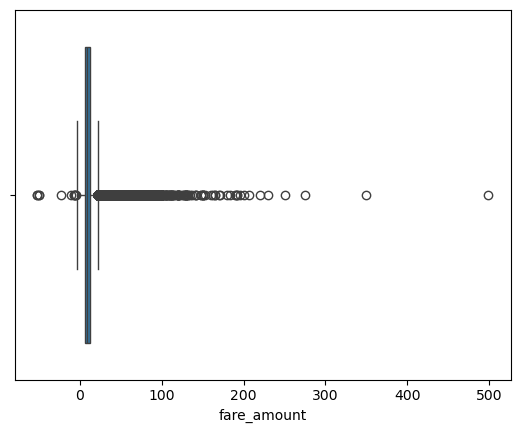

In [30]:
sns.boxplot(x = "fare_amount", data = d)

<Axes: xlabel='fare_amount'>

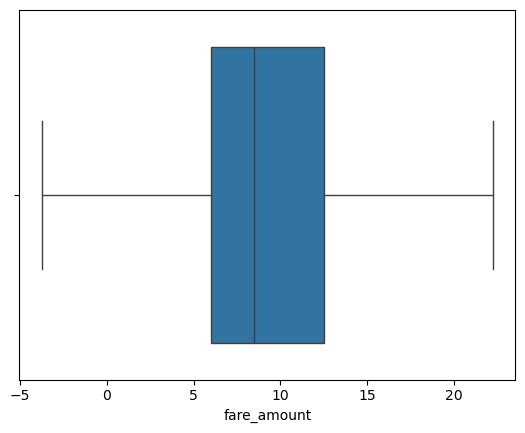

In [32]:
sns.boxplot(x = "fare_amount", data = no_outlier)

In [ ]:
for col in no_outlier.columns:
    sns.boxplot(x = no_outlier[col])
    plt.show()

In [ ]:
df_clean = pd.concat([no_outlier, categ], axis=1)
df_clean

In [ ]:
df_clean.columns

In [ ]:
# TASK3
import matplotlib.pyplot as plt
num = [10, 15, 30, 200, 1000, 5000, 10000, 50000]
data_s=[]
data_s_mean=[]
sample_df=pd.DataFrame()
k=0
fig, ax = plt.subplots(2, 4, figsize =(15, 8))
for i in num:
    sample_df=d.sample(n=i, random_state=1, replace=True) 
    data_s.append(sample_df['fare_amount'].tolist())
    data_s_mean.append(sample_df['fare_amount'].mean())
k=0
for i in range(0, 2):
    for j in range(0, 4):
        sns.distplot(data_s[k],ax=ax[i, j])
        ax[i, j].set_title(label = 'Sample size='+str(len(data_s[k])))
        k = k + 1
plt.show()

# As the sample size incresases from 200 to 50000 the right skewness decreses and becomes normal distribution and appers more like normal distribution at 50000 which satisfies CLT

In [ ]:
# TASK4
random_sampling = d.sample(n = 200, random_state = 42, replace = True)
random_sampling

In [ ]:
# TASK5
import statistics as stats
col = d["fare_amount"]
mean = col.mean()
median = col.median()
mode = col.mode()
print(f"mean value is {mean}")
print(f" median value is {median}")
print(f" mode value is {mode}")
range1 = max(col) - min(col)
print("range:",range1)
variance = stats.variance(col)
print("variance: ",variance)
std_dev = stats.stdev(col)  # Sample standard deviation
print("Standard Deviation:", std_dev)
cv = (stats.stdev(col) / stats.mean(col)) * 100  # in percentage
print("Coefficient of Variation (%):", cv)



In [ ]:
col1 = random_sampling["fare_amount"]
mean = col1.mean()
median = col1.median()
mode = col1.mode()
print(f"mean value is {mean}")
print(f"median value is {median}")
print(f"mode value is {mode}")
range1 = max(col1) - min(col1)
print("range:",range1)
variance = stats.variance(col1)
print("variance: ",variance)
std_dev = stats.stdev(col1)  # Sample standard deviation
print("Standard Deviation:", std_dev)
cv = (stats.stdev(col1) / stats.mean(col1)) * 100  # in percentage
print("Coefficient of Variation (%):", cv)


# By doing crentral tendency for the random sample of size 200 the mean n median are near where as mode is too far from this values